# Exploring links on Thelema subreddit

## Modules and data import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

## Initial data exploration

In [2]:
data = pd.read_csv("links.csv")
data["created_utc"] = pd.to_datetime(data["created_utc"])
data.head(10)

,Unnamed: 0,author,created_utc,downs,id,num_comments,over_18,score,title,ups
0,0,UnplugYourTV,2017-07-11 15:33:59,0,6mmyv2,6,False,1,Do What Thou Wilt,1
1,1,fnord666,2017-07-09 22:30:46,0,6mag84,0,False,4,Babalon/Therion,4
2,2,IAO131,2017-07-06 18:32:18,0,6lnrjk,3,False,12,Gerald Gardner &amp; Ordo Templi Orientis: A N...,12
3,3,Nancykillsyou,2017-07-06 12:30:22,0,6llfh8,17,False,7,Crowley Books U recommend for Life Betterment?,7
4,4,grimslade,2017-07-06 03:02:20,0,6lj0lq,0,False,9,Chicago Library Seeks Help Transcribing Magica...,9
5,5,gettrix,2017-07-06 00:52:16,0,6liapr,1,False,6,Be Grateful to Your Teacher,6
6,6,muffinmania583,2017-07-04 23:00:19,0,6lacgi,8,False,18,Happy 4th of July to the American Thelemites!,18
7,7,FallWithHonor,2017-07-02 13:54:55,0,6ktcaf,4,False,2,Rise of the Necromancer,2
8,8,IAO131,2017-07-01 23:55:31,0,6kqbbr,7,False,14,Aleister Crowley &amp; Taoism,14
9,9,IAO131,2017-06-30 21:47:32,0,6kj2r3,0,False,13,Women &amp; Thelema — Thelemic Union,13


In [3]:
data.tail(10)

,Unnamed: 0,author,created_utc,downs,id,num_comments,over_18,score,title,ups
938,938,fgfs262,2014-06-10 16:19:30,0,27soc0,2,False,9,An art gallery/wedding venue in Seattle closed...,9
939,939,IAO131,2014-06-10 00:01:26,0,27qret,0,False,7,"Rutgers University Libraries, in association w...",7
940,940,IAO131,2014-06-10 00:01:00,0,27qrdj,1,False,9,Priestess in a savage country,9
941,941,IAO131,2014-06-10 00:00:32,0,27qrc5,0,False,8,Help Blazing Star O.T.O. build a new High Altar!,8
942,942,IAO131,2014-06-09 23:59:37,0,27qr8h,0,False,2,Tickets now on sale for Eleusyve Production's ...,2
943,943,IAO131,2014-06-09 23:58:57,0,27qr6j,0,False,3,Collective777's Thelemic year calendar,3
944,944,IAO131,2014-06-09 23:58:34,0,27qr5i,3,False,7,The Thoth Tarot is still available for purchase,7
945,945,IAO131,2014-06-09 23:57:35,0,27qr2k,10,False,33,Crowley quoted by Wilson on Home Improvement,33
946,946,IAO131,2014-06-09 23:56:55,0,27qr0j,0,False,5,Enjoy Thelema!,5
947,947,IAO131,2014-06-09 23:55:30,0,27qqw7,2,False,11,Read the fucking manual.,11


Data contains basic information about links posted on Thelema subreddit. Let's investigate authors first.

## Authors

### Links published by authors

In [4]:
data["author"].describe()

count        948
unique       324
top       IAO131
freq         175
Name: author, dtype: object

In [5]:
posts = data["author"].value_counts().reset_index()
posts.rename(columns = {"index" : "author", "author": "links"}, inplace=True)
posts[0:9]

,author,links
0,IAO131,175
1,[deleted],42
2,QTheMuse,24
3,CLXIX,22
4,fgfs262,20
5,MarquisDesMoines,18
6,PumpkinDevourer,18
7,sunkindonut149,16
8,nthlmkmnrg,16


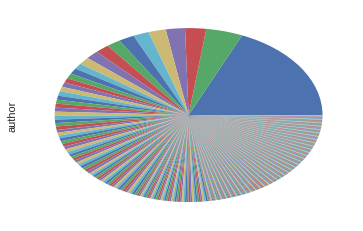

In [6]:
fig = data["author"].value_counts()[:].plot.pie(labels = None)
plt.show()

As we can see, about 18% of the links is posted by IAO131. On the second place are posts published by [deleted] users. Third is user named QTheMuse, whose input is only about 15% of IAO131 posts.

There are 324 unique authors in the data, there were probably many more but accounts were deleted.

From data about 10 last links published on Thelema subreddit, which are sorted by date, we can conclude that he is also the creator of this subreddit. 

#### IAO131

Below is the link to the IAO131 blog.

https://iao131.com/about/


From the above, we can conclude also that his presence in the internet is very high, it is strenghten by his publications.

### Authors popularity

The number of posted links desribes only user's activity on the subreddit. It would be nice to investigate, if other users regard links helpful or interesting.

We can measure it by ups, downs, score and number of comments posted under link.

In [7]:
sudptable = data.pivot_table(index=["author"], values=["score", "ups", "downs"], aggfunc=sum).reset_index()
sudptable.sort_values(inplace=True, by="score", ascending=False)
sudptable[0:9]

,author,downs,score,ups
67,IAO131,0,1996,1996
25,CLXIX,0,293,293
114,QTheMuse,0,286,286
160,[deleted],0,264,264
207,fgfs262,0,259,259
82,MarquisDesMoines,0,253,253
264,nthlmkmnrg,0,176,176
10,Ararita,0,140,140
112,PumpkinDevourer,0,133,133


In [8]:
ncptable = data.pivot_table(index=["author"], values=["num_comments"], aggfunc=sum).reset_index()
ncptable.sort_values(inplace=True, by="num_comments", ascending=False)
ncptable[0:9]

,author,num_comments
67,IAO131,670
160,[deleted],387
112,PumpkinDevourer,281
10,Ararita,148
300,sunkindonut149,135
114,QTheMuse,125
82,MarquisDesMoines,113
25,CLXIX,102
19,Bouda,100


Raw data is greatly showing that IAO131 posts are regarded very positively also they are frequently commented. It seems that members of the community does not use downvotes.

Let's see if this trend is sustainded when we calculate scores relative to number of links.

In [9]:
score_rate = sudptable[["author", "score"]]
score_rate = pd.merge(score_rate, posts, how="left", on="author")
score_rate["rate"] = score_rate["score"] / score_rate["links"]
score_rate.sort_values(inplace=True, by="links", ascending=False)
score_rate[0:9].sort_values(by="rate", ascending=False)

,author,score,links,rate
5,MarquisDesMoines,253,18,14.055556
1,CLXIX,293,22,13.318182
4,fgfs262,259,20,12.950000
2,QTheMuse,286,24,11.916667
0,IAO131,1996,175,11.405714
6,nthlmkmnrg,176,16,11.000000
8,PumpkinDevourer,133,18,7.388889
3,[deleted],264,42,6.285714
12,sunkindonut149,89,16,5.562500


In top10 authors score/links rate is pretty close to each other.

In [10]:
comment_rate = ncptable[["author", "num_comments"]]
comment_rate = pd.merge(comment_rate, posts, how="left", on="author")
comment_rate["rate"] = comment_rate["num_comments"] / comment_rate["links"]
comment_rate.sort_values(inplace=True, by="links", ascending=False)
comment_rate[0:9].sort_values(by="rate", ascending=False)

,author,num_comments,links,rate
2,PumpkinDevourer,281,18,15.611111
1,[deleted],387,42,9.214286
4,sunkindonut149,135,16,8.437500
6,MarquisDesMoines,113,18,6.277778
5,QTheMuse,125,24,5.208333
7,CLXIX,102,22,4.636364
12,fgfs262,82,20,4.100000
20,nthlmkmnrg,62,16,3.875000
0,IAO131,670,175,3.828571


Number of comments rate varies much, there must be some reason why PumpkinDevourer has ~15 comments in every link. Let's look at his links:

In [11]:
pumpkin = data["author"] == "PumpkinDevourer"
pd.options.display.max_colwidth = 100
data[pumpkin].sort_values(by="num_comments", ascending=False)[0:9][["author", "num_comments", "score", "title"]]


,author,num_comments,score,title
493,PumpkinDevourer,50,4,"Lineages, lineages, lineages!"
340,PumpkinDevourer,34,9,"""It is immaterial whether or not these things exist..."" A rant!"
398,PumpkinDevourer,33,8,Age of the average Thelemite? Survey time!
337,PumpkinDevourer,31,19,Those who feel the A.'.A.'. reading list is outdated: modern alternatives?
477,PumpkinDevourer,17,14,How demanding is the A.A.?
274,PumpkinDevourer,15,10,Asana and tenseness
417,PumpkinDevourer,14,8,The method of science?
296,PumpkinDevourer,13,6,Are there any mentions of martial arts in thelemic writings?
118,PumpkinDevourer,13,7,The Grade Signs and Slavish Imitation


Titles of the links are describing this case pretty good. Post published by the author are controversial in Thelemic community.

1. Lineages of A.:.A.:. is very emotional topic, even when for the large group it is theoretical. There is a problem of claimants groups who describe themselves as the only real Order.
2. Question of objectivity of magical phenomena.
3. Survey about age.
4. Another topic about actuality of teaching method of A.:.A.:. order
5. Topic can be connected with problems of 1st and 4th topics.

## Topics

Now I will investigate most popular topics and find most common words used.

In [12]:
pd.options.display.max_colwidth = 200
data.sort_values(by="score", ascending=False)[["author", "title", "score", "num_comments"]][0:19]

,author,title,score,num_comments
782,dugpa,Got this in my fortune cookie tonight. Thought you guys might get a kick out of it.,50,8
345,Ararita,PSA: Commenting on Priestesses,48,31
463,aj07mm,Thelemite programmers here is a github repo with all data from liber 777 on json format!,42,7
56,QTheMuse,"Today marks the beginning of ""A feast for the three days of the writing of the Book of the Law."" (AL II:38) This is a friendly reminder to read Chapter I today.",39,3
605,MarquisDesMoines,"I remember Robert Anton Wilson talking about handing these out back in the day as an alternative to ""Pope"" cards. Seems legit ;)",38,0
861,CLXIX,A progression I would like to share with you guys. 2 years ago I deciphered my masterpiece.,37,15
245,IAO131,A Thelemic Political Manifesto,34,38
604,IAO131,"On the Internet, nobody knows you're Illuminati",33,0
945,IAO131,Crowley quoted by Wilson on Home Improvement,33,10
97,fusionblade,Great placement!,33,0


It seems that the most popular posts are made of original content published on the reddit, helpful things for others and humour.

In [13]:
from nltk.corpus import stopwords
stop_word_list = stopwords.words('english')

titles_string = data["title"].apply(lambda s: s + " ").sum().lower()
titles_list = titles_string.split(" ")

for w in stop_word_list:
    unclean = True
    while unclean:
        try:
            titles_list.remove(w)
        except ValueError:
            unclean = False

titles_serie = pd.Series(titles_list)
pd.set_option('display.max_rows', 100)
titles_serie.value_counts().head(100)

thelema       80
thelemic      80
-             63
crowley       53
liber         53
aleister      48
new           43
&amp;         37
book          31
oto           31
|             27
o.t.o.        21
—             19
union         19
magick        19
gnostic       18
law           17
question      16
ritual        16
crowley's     16
star          16
looking       14
al            13
mass          13
books         13
thoth         13
thelemite     13
part          13
thelema?      13
a.'.a.'.      12
first         12
like          12
silence       12
i'm           11
tarot         11
available     11
speech        11
life          11
would         11
anyone        10
resh          10
one           10
holy          10
help           9
good           9
lodge          9
feast          9
iao131         9
made           9
2              9
know           9
vel            9
david          9
questions      8
aeon           8
read           8
ordo           8
thelemites     8
youtube       

Above list of 100 most popular words is not entirely cleaned, but gives us much interesting information.

Large part of topics contains "thelema" word variations. Users discuss on Thelema founder Aleister Crowley and thelemic orders like Ordo Templi Orientis and A.:.A.:.. Many topics are about official instructions containded in so called Libers (books) and specific one - Liber AL. Community is interested in magick and rituals (Magick, Gnostic Mass, Resh...) and tarot. Holy Books of Thelema also apears in some topics (holy, books, thelema). The Law is discussed here also.

Interestingly, topics about Ordo Templi Orientis seems to appear frequently.

In [14]:
findings = data["title"].str.contains("oto|o\.t\.o\.|ordo", case=False)
findings.value_counts()

False    872
True      76
Name: title, dtype: int64

In [15]:
oto = data[findings]
oto

,Unnamed: 0,author,created_utc,downs,id,num_comments,over_18,score,title,ups
2,2,IAO131,2017-07-06 18:32:18,0,6lnrjk,3,False,12,Gerald Gardner &amp; Ordo Templi Orientis: A New and Greater Pagan Cult,12
17,17,qevlhma,2017-06-20 18:27:50,0,6ifye1,8,False,24,My New O.T.O. Lamen Tattoo,24
36,36,sanpedro90,2017-05-07 05:52:39,0,69pu03,5,False,9,When do the OTO's Crowley copyrights expire?,9
39,39,IAO131,2017-05-02 04:01:46,0,68qy81,1,False,12,Symbolism of the Sun | Blazing Star OTO,12
65,65,[deleted],2017-04-01 15:51:54,0,62tioi,4,False,4,"""Hermits of The O.T.O."" a lecture by L.M.D.",4
74,74,CodeReaper,2017-03-25 13:55:49,0,61fmcw,9,False,5,"In the OTO, does the eucharist really have the ingredients listed in the Liber AL?",5
78,78,sanpedro90,2017-03-23 23:33:04,0,615ik3,22,False,12,How difficult is it to move up the ranks in the OTO?,12
113,113,quantumcipher,2017-02-16 05:50:23,0,5ud23b,1,False,13,Lon DuQuette: 40 Years in the OTO,13
116,116,Hag8ardCeline,2017-02-15 03:10:24,0,5u5009,1,False,12,Joining the OTO in UK,12
138,138,IAO131,2017-01-23 18:52:03,0,5pqrnn,21,False,10,Attrition in OTO Bodies: A Response to Brother Fouts — Thelemic Union,10


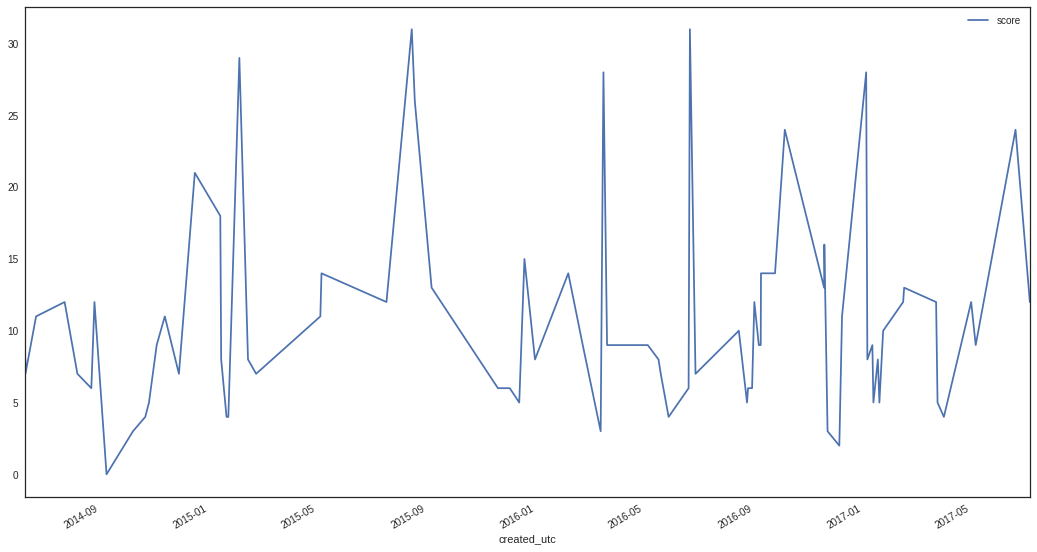

In [16]:
oto.plot(x="created_utc", y="score", figsize=(18,10))
plt.show()

In [17]:
d = dict()
srtd = oto.sort_values(by="created_utc")
index = 1
for i in range(0,len(srtd["created_utc"])):
    if i == 0:
        pm = srtd["created_utc"].iloc[i].month
    else:
        pm = am
    am = srtd["created_utc"].iloc[i].month
    if not d.get(index):
        d[index] = 1
    else:
        d[index] += 1
    if pm != am:
        index += 1

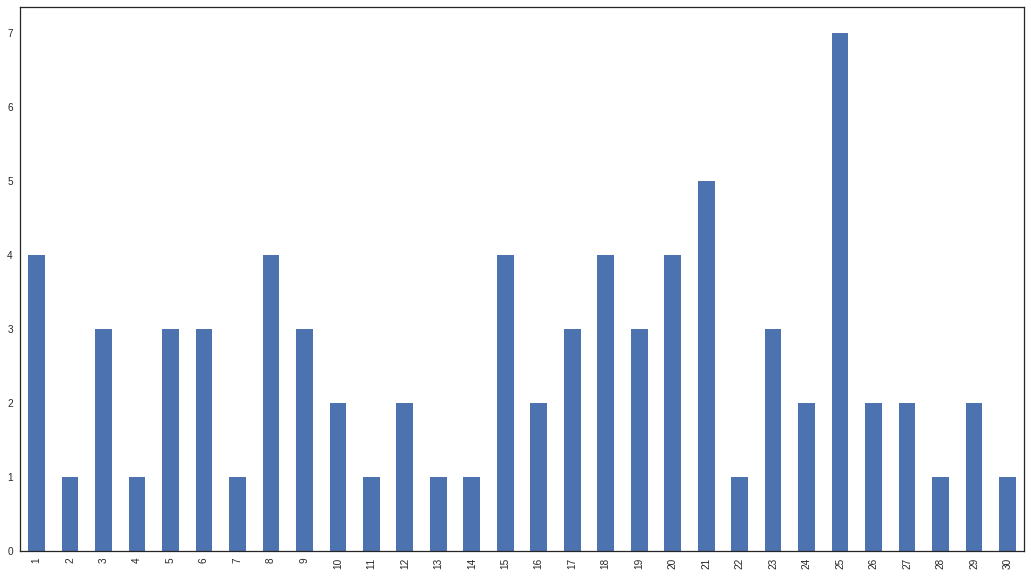

In [18]:
ser = pd.Series(d)
ser.plot.bar(figsize=(18,10))
plt.show()

In [19]:
sum(list(d.values()))/len(list(d.values()))

2.533333333333333

Plot above visualizes occurances of O.T.O. in the titles in months from the creation of Thelema subreddit. Average occurances in month is ~2.5. In the 25th month there were 7 mentions of the O.T.O.. Let's see what was happening there and what are those links.

In [20]:
index = 1
for i in range(0,len(srtd["created_utc"])):
    if i == 0:
        pm = srtd["created_utc"].iloc[i].month
    else:
        pm = am
    am = srtd["created_utc"].iloc[i].month
    if pm != am:
        index += 1
    if index == 25:
        print("{0} {1} {2} {3}".format(srtd["created_utc"].iloc[i], srtd["title"].iloc[i], srtd["author"].iloc[i] , srtd["score"].iloc[i]))

2017-01-04 19:20:55 8 Things I Wish I Knew as a Newbie in the OTO — Thelemic Union IAO131 28
2017-01-06 03:06:05 Mysteries of Ordo Templi Orientis (O.T.O.) IAO131 8
2017-01-11 17:46:13 OTO Initiation is a Path of Service — Thelemic Union IAO131 9
2017-01-12 21:26:20 A Sword in my Hand: A good lecture about AC's evolving view of what the OTO is/should be. (pt. 2 in comments) MarquisDesMoines 5
2017-01-17 20:55:05 Mindfulness Based Stress Reduction -- Blazing Star OTO Youtube channel IAO131 8
2017-01-19 13:48:25 Pythagorean schools and AA/OTO duplexity BrenoZ 5
2017-01-23 18:52:03 Attrition in OTO Bodies: A Response to Brother Fouts — Thelemic Union IAO131 10


5/7 posts are made by IAO131 and are connected with appearance of his articles on Thelemic Union blog. As we can see, author cares about his internet presence, trying to popularize topic of Thelema. His articles seems to be targeted to newbies and potential candidates, where he explain unclear information surrounding O.T.O. and Thelema, sharing his psychological insights, doing it in popular form.

## Conclusions

From this short analisis it can be concluded, how to work on the presence in the internet, basing mainly on one author who use many tools to achieve his goals. Short summary in points below:
1. Use social media channels that are existing, if there is no such group/blog, but there is popular platform - create it.
2. Use plain language, which newcomers can understand.
3. Publish your content regularly.
4. Publish content which can help others.
5. Connect helpful material with keywords you want to promote.
6. Interlink your work from many social media and internet platforms